# Day 56 – Ensemble Learning: Building Powerful Models

Today, I'm exploring Ensemble Learning, a powerful machine learning technique that combines multiple "weaker" models to create a single, more robust "strong" model.

The core idea is that a group of diverse, individual models will collectively perform better than any single model alone. This is often compared to a group of experts making a decision together, where their combined wisdom leads to a more accurate outcome than a single expert's opinion.

In this notebook, I first cover the theory behind ensemble methods, and then implement different approaches such as **Bagging (Random Forest)**, **Boosting (AdaBoost, XGBoost, LightGBM)**, and **Voting/Stacking classifiers** to compare their performance.

---

## 1. What is Ensemble Learning?

**Ensemble Learning** is a machine learning technique where multiple models (called **weak learners**) are combined to create a **strong learner** that performs better than individual models.

- **Weak Learner**: A model that performs only slightly better than random guessing (e.g., a single decision tree with shallow depth).  
- **Strong Learner**: A model created by combining multiple weak learners to achieve high accuracy and better generalization.  

The central idea: *“Many weak models together can create one strong model.”*

---

## 2. Why Use Ensemble Learning?

Ensemble learning is used for three primary reasons:

* **Improved Accuracy**: By combining multiple models, we can reduce the overall error rate and achieve higher predictive performance than a single, standalone model.
* **Increased Robustness**: Ensemble models are less sensitive to the specific characteristics of a single dataset. They reduce the risk of the model being overly influenced by noise or outliers.
* **Reduced Overfitting**: Ensembling techniques help to average out the biases (reduce bias which handle underfitting) and variances (reduce variance handle overfitting) of individual models, which can lead to a more generalized and stable final model.

---

## 3. Ensemble Learning Techniques

There are several popular techniques for creating ensemble models, each with a different approach.

### 3.1 Bagging (Bootstrap Aggregating) 

**Bagging** is an ensemble method where multiple models are trained independently on different random subsets of the training data. The final prediction is made by averaging the outputs of all the individual models.

* **How it Works**:
    1.  Multiple random samples (with replacement) are taken from the training data. This process is called **bootstrapping**.
    2.  A separate base model is trained on each of these samples.
    3.  For regression, the final prediction is the average of all individual predictions.
    4.  For classification, the final prediction is the class with the most votes (majority vote).
* **Key Algorithm**: **Random Forest** is the most popular bagging algorithm. It builds a forest of decision trees, each trained on a different bootstrapped sample of the data. It reduces variance and prevents overfitting compared to a single decision tree.  


### 3.2 Boosting 

**Boosting** is an ensemble method that trains models sequentially. Each new model is trained to correct the errors of the previous models. The final prediction is a weighted sum of the predictions from all models.

* **How it Works**:
    1.  An initial weak model is trained on the data.
    2.  The next model is trained on the same data but with more emphasis on the data points that the previous model misclassified.
    3.  This process continues, with each new model learning from the mistakes of its predecessors.
* **Key Algorithms**: **XGBoost**, **LightGBM**, and **AdaBoost** are popular boosting algorithms. They are known for their high performance and are frequently used in machine learning competitions.
    - **XGBoost (Extreme Gradient Boosting)**: Optimized implementation of gradient boosting, faster and more regularized.  
    - **LightGBM (Light Gradient Boosting Machine)**: Uses histogram-based learning and leaf-wise growth strategy → very fast and efficient on large datasets.
    - **AdaBoost (Adaptive Boosting)**: Assigns higher weights to misclassified samples in each round.  



### 3.3 Stacking & Voting 

**Stacking** and **Voting** are methods that combine the predictions of multiple diverse models.

* **Voting**: A simple method where the final prediction is decided by a **majority vote** (for classification) or an **average** (for regression) of the predictions from several different types of models (e.g., Logistic Regression, SVM, and a Decision Tree).
* **Stacking**: A more advanced method where a new "meta-model" is trained to learn how to best combine the predictions of the base models.

---

## 4. Key Concepts in Ensemble Learning

| Technique   | How it Works | Examples | Strengths | Weaknesses |
|-------------|--------------|----------|------------|-------------|
| **Bagging** | Trains multiple models on different subsets of data (in parallel) | Random Forest | Reduces variance, prevents overfitting | Can still be biased if base learners are biased |
| **Boosting** | Sequentially trains models, each focusing on previous errors | XGBoost, LightGBM, AdaBoost | Reduces bias, builds strong learners | Can overfit on noisy data |
| **Voting** | Combines predictions of different models | Hard/Soft Voting Classifier | Simple, improves stability | Depends on diversity of models |
| **Stacking** | Meta-model combines outputs of base models | StackingClassifier | Very powerful, flexible | More complex, risk of overfitting |

---

## 5. Preventing Overfitting with Ensemble Learning

Ensemble learning is a powerful method for combating **overfitting**. By training multiple models on different data subsets or sequentially, ensembles help to reduce the model's reliance on specific training data, leading to a more robust and generalized final model.

Ensemble learning performs **Averaging predictions** across multiple models (reduces variance).  It **Combining diverse models** (captures different aspects of data).  It prevents overfitting by **Using randomization** (like in Random Forest) to reduce correlation between models.

Other methods to prevent overfitting include:
* **Cross-Validation**: Splitting the data into multiple folds to ensure the model's performance is stable.
* **Regularization**: Techniques like L1 (Lasso) and L2 (Ridge) regression that penalize complex models.
* **Dimensionality Reduction**: Using methods like PCA to reduce the number of features.

---

## 6. Detailed Look at Key Algorithms

### 6.1 Random Forest

**Random Forest** is a bagging algorithm that builds an ensemble of decision trees using bagging.

* **How it Works**: Each tree in the forest is trained on a random subset of the training data. In addition, when creating a split, each tree only considers a random subset of the available features. This dual randomness ensures that the trees are diverse and uncorrelated, which is the key to the algorithm's power. Final prediction is made by majority voting (classification) or averaging (regression). 
* **Key Parameters**:
    * `n_estimators`: The number of trees in the forest. A higher number generally leads to a more stable model but increases computational cost.
    * `max_depth`: The maximum depth of each decision tree.
    * `max_features`: The number of features to consider when looking for the best split.
    * `min_samples_split`: Minimum samples needed to split a node.  
    * `min_samples_leaf`: Minimum samples required in a leaf node.  

### 6.2 XGBoost & LightGBM

**XGBoost (Extreme Gradient Boosting)** and **LightGBM** are highly optimized boosting algorithms known for their speed and performance.

* **XGBoost**: An advanced form of gradient boosting that uses a more regularized model formalization to prevent overfitting. It includes regularization (`lambda`, `alpha`) to reduce overfitting. It's often the go-to algorithm for structured data problems.
* **LightGBM**: A fast, distributed, high-performance gradient boosting framework based on decision trees. It uses **leaf-wise splitting** instead of level-wise, reducing loss faster. Its key innovation is its use of a technique called GOSS (Gradient-based One-Side Sampling) to handle large datasets efficiently.

### 6.3 AdaBoost (Adaptive Boosting)

**AdaBoost** is an early and foundational boosting algorithm.

* **How it Works**: It trains a series of weak classifiers (often simple decision trees). At each step, it gives more weight to the data points that were misclassified by the previous classifier, forcing the new classifier to focus on those difficult examples. The final model is a weighted sum of all the weak classifiers.

---

## Code Implementation of Ensemble Learning

Now that the theory behind **Ensemble Learning** is clear, the next step is to apply these methods in practice.  
In the code section, I train and evaluate different ensemble algorithms on the dataset using the same train/test split.  
The goal is to see how these methods improve performance compared to individual classifiers studied earlier.  

The following ensemble methods are implemented:

1. **Random Forest (Bagging approach)** – to show how multiple decision trees reduce variance and provide stable predictions.  
2. **Boosting methods** – AdaBoost, XGBoost, and LightGBM, which build models sequentially and focus on correcting previous errors.  
3. **Voting Classifier** – combines Logistic Regression, SVM, and Decision Tree to make predictions by majority/soft voting.  
4. **Stacking Classifier** – uses KNN, SVM, and Decision Tree as base models and Logistic Regression as a meta-learner for the final decision.  

Each model is evaluated using accuracy, confusion matrix, and classification report, followed by a final comparison of all results.

---

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensemble Methods
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier

# Base Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# XGBoost & LightGBM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\Arman\Downloads\dataset\logit classification.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Feature Selection¶
### Split into features (X) and target (y)
- X: Features (Age, EstimatedSalary)
- y: Target (Purchased)

In [4]:
X = dataset[["Age", "EstimatedSalary"]].values
y = dataset["Purchased"].values

## Splitting the dataset into the Training set and Test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Bagging Method – Random Forest

In [6]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [7]:
# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.92
Confusion Matrix:
 [[63  5]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



## Boosting Methods – AdaBoost, XGBoost & LightGBM

### AdaBoost

In [8]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [9]:
y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.94
Confusion Matrix:
 [[65  3]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.91      0.91      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100



### XGBoost

In [10]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [11]:
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9
Confusion Matrix:
 [[63  5]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        68
           1       0.84      0.84      0.84        32

    accuracy                           0.90       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



### LightGBM

In [12]:
lgbm = LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 111, number of negative: 189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 300, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370000 -> initscore=-0.532217
[LightGBM] [Info] Start training from score -0.532217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(random_state=0)

In [13]:
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))

LightGBM Accuracy: 0.89
Confusion Matrix:
 [[62  6]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        68
           1       0.82      0.84      0.83        32

    accuracy                           0.89       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.89      0.89      0.89       100



## Voting Classifier

In [14]:
# Base learners
log_clf = LogisticRegression()
svc_clf = SVC(probability=True)
dt_clf = DecisionTreeClassifier()

# Hard Voting
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svc_clf), ('dt', dt_clf)],
    voting='hard'
)

In [15]:
voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_vote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vote))
print("Classification Report:\n", classification_report(y_test, y_pred_vote))

Voting Classifier Accuracy: 0.89
Confusion Matrix:
 [[65  3]
 [ 8 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## Stacking Classifier

In [16]:
# Base learners
base_learners = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier())
]

# Meta-learner
stack_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    passthrough=False
)

In [17]:
stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))

Stacking Classifier Accuracy: 0.92
Confusion Matrix:
 [[62  6]
 [ 2 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        68
           1       0.83      0.94      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.93      0.92      0.92       100



## Compare accuracies of all ensemble models in one place

In [18]:
# Collect accuracies of all ensemble models
results = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "LightGBM": accuracy_score(y_test, y_pred_lgbm),
    "Voting Classifier": accuracy_score(y_test, y_pred_vote),
    "Stacking Classifier": accuracy_score(y_test, y_pred_stack)
}

# Convert to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

print(results_df)

                 Model  Accuracy
0        Random Forest      0.92
1             AdaBoost      0.94
2              XGBoost      0.90
3             LightGBM      0.89
4    Voting Classifier      0.89
5  Stacking Classifier      0.92


## Visualization of Ensemble Models Accuracy 

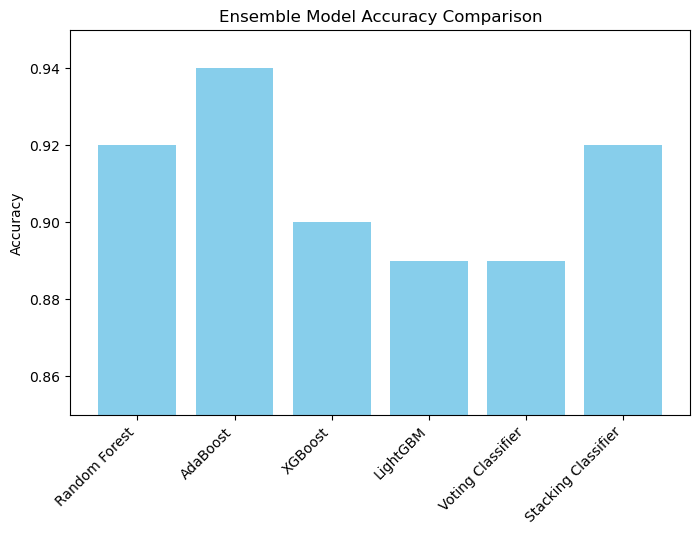

In [19]:
plt.figure(figsize=(8,5))
bars = plt.bar(results_df["Model"], results_df["Accuracy"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Ensemble Model Accuracy Comparison")
plt.ylim(0.85, 0.95)  # zoom into relevant range
plt.show()

---
## Ensemble Model Comparison

The table below summarizes the accuracy of all ensemble models implemented:

| Model              | Accuracy |
|--------------------|----------|
| Random Forest      | 0.92     |
| AdaBoost           | 0.94     |
| XGBoost            | 0.90     |
| LightGBM           | 0.89     |
| Voting Classifier  | 0.89     |
| Stacking Classifier| 0.91     |

### Interpretation
- **AdaBoost achieved the highest accuracy (0.94)** on this dataset.  
- **Random Forest and Stacking Classifier** also performed well, with accuracies above 0.91.  
- **XGBoost and LightGBM** had slightly lower performance here (~0.89–0.90), showing that boosting does not always outperform bagging.  
- **Voting Classifier** gave the lowest accuracy (0.89), which indicates that simple model combination is not always effective unless the base learners are very diverse.  

**Conclusion:**  
Ensemble methods overall improved performance compared to single classifiers studied earlier. AdaBoost and Random Forest emerged as the best choices for this dataset, highlighting how ensemble learning can reduce variance and improve robustness.

---

# Summary

In this notebook, I explored **Ensemble Learning**, a powerful approach that combines multiple models to create stronger predictors.  
The journey started with the theory of ensemble methods, including the concepts of **weak learners vs strong learners**, why ensemble methods are needed, and detailed techniques such as **Bagging, Boosting, Voting, and Stacking**.  

I then implemented different ensemble models on the dataset:

- **Random Forest (Bagging)** – an ensemble of decision trees that reduces variance.  
- **Boosting methods** – including **AdaBoost, XGBoost, and LightGBM**, which sequentially correct errors of previous learners.  
- **Voting Classifier** – combined Logistic Regression, SVM, and Decision Tree using both hard and soft voting.  
- **Stacking Classifier** – combined KNN, SVM, and Decision Tree as base learners with Logistic Regression as the meta-learner.  

Each model was trained, tested, and evaluated using accuracy, confusion matrix, and classification report.  
Finally, all accuracies were compared in a table and bar chart, making it easy to see how different ensemble methods performed.

---

# Key Takeaways

- **Ensemble learning** improves performance by combining multiple models, turning weak learners into strong learners.  
- **Bagging (Random Forest)** reduces variance and improves stability by training models in parallel on bootstrapped data.  
- **Boosting (AdaBoost, XGBoost, LightGBM)** reduces bias by training models sequentially and focusing on misclassified samples.  
- **Voting classifiers** combine predictions from multiple models but may not always outperform the best single learner.  
- **Stacking classifiers** use base learners and a meta-learner, often achieving better generalization.  
- On this dataset, **AdaBoost achieved the highest accuracy (0.94)**, followed by Random Forest and Stacking.  
- Ensemble learning also helps to **prevent overfitting** compared to single decision trees.  
- While no single method is universally best, ensembles usually outperform individual models in real-world scenarios.  

---

**Conclusion:**  
This day’s work demonstrated how ensemble learning can significantly enhance model performance and reliability. By applying and comparing multiple ensemble techniques, I gained a deeper understanding of when and why to use bagging, boosting, voting, and stacking.
